Created by: Damien Stephens
Created on: August 25, 2020

This file shows a simple example of multiclass image classification using an artificial neural network (ANN).

# Imports

In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# show the version of tensorflow being used
print(f"Tensorflow Version: {tf.__version__}")

Tensorflow Version: 2.3.0


# Data Preprocessing

In [3]:
# load the datasets from fashion_mnist into training and testing tuples
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [4]:
# show the shape of the loaded datasets
# x_train - 60000 images, each with a size of 28 x 28
# y_train - 60000 labels corresponding to the images in x_train
# x_test - 10000 images, each with a size of 28 x 28
# y_test - 10000 labels corresponding to the images in x_test

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape:  {x_test.shape}")
print(f"y_test shape:  {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [5]:
# see what the maximum, minimum, and mean values are in x_train
print(f"x_train Max Value:  {np.max(x_train)}")
print(f"x_train Min Value:  {np.min(x_train)}")
print(f"x_train Mean Value: {np.mean(x_train):.1f}")

x_train Max Value:  255
x_train Min Value:  0
x_train Mean Value: 72.9


In [6]:
# see what the maximum and minimum values are in y_train
print(f"y_train Max Value:  {np.max(y_train)}")
print(f"y_train Min Value:  {np.min(y_train)}")

y_train Max Value:  9
y_train Min Value:  0


In [7]:
# define the classes as a list
class_names = ['0 Top/T-Shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat',
               '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

### Data Exploration

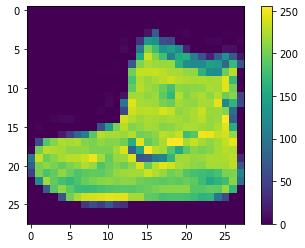

In [8]:
# show the first image in x_train
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [9]:
# show the label for the first image in x_train
print(f"x_train[0] = {class_names[y_train[0]]}")

x_train[0] = 9 Ankle boot


### Normalize the Dataset

In [10]:
# this helps the neural network learn faster
x_train = x_train / 255.0
x_test = x_test / 255.0

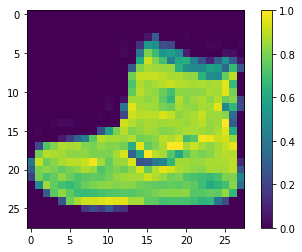

In [11]:
# show the image after it has been normalized
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

### Flatten the Dataset

In [12]:
# show the current shape of the data
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
# -1 selects all images in the dataset
# 28*28 converts the 2D 28 x 28 dimension into a 1D dimension

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [14]:
# show the flattened shape of the data
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Build the Model

In [15]:
# define an object
model = tf.keras.models.Sequential()

# adding the first fully connected hidden layer 
# parameters:
# 1) units (number of neurons) = 128
# 2) activation function = ReLU
# 3) input shape = 784 entered as (784,)
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

# adding the second layer with dropout
# dropout: a regularization technique where randomly selected neurons will be ignored during training
#          to prevent overfitting
model.add(tf.keras.layers.Dropout(rate=0.3))

# adding the output layer
# parameters:
# 1) units (neurons) = 10     10 units because there are 10 possible classifications in the data (0-9)
# 2) activation = softmax     softmax is used when there are multiple outputs, sigmoid for binary outputs
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Train the Model

In [16]:
# compile the model
# parameters:
# 1) optimizer = adam     updates the weight parameter to minimize the loss function
# 2) loss function        acts as a guide to the optimizer
# 3) metrics              tracks the accuracy (for binary outputs we use metrics=accuracy)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# give an summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
# begin training the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.5529 - sparse_categorical_accuracy: 0.8020
Epoch 2/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.4178 - sparse_categorical_accuracy: 0.8484
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3874 - sparse_categorical_accuracy: 0.8578
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3684 - sparse_categorical_accuracy: 0.8643
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3534 - sparse_categorical_accuracy: 0.8694
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3411 - sparse_categorical_accuracy: 0.8749
Epoch 7/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.3323 - sparse_categorical_accuracy: 0.8778
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3256 - sparse_categorical_accuracy: 0.8783
Epoch 9/10
1875/1875 [====

# Model Evaluation

In [18]:
# use the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# print the accuracy and loss
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 [==============================] - 0s 695us/step - loss: 0.3367 - sparse_categorical_accuracy: 0.8837
Test Accuracy: 0.8837
Test Loss: 0.3367


# Model Prediction

In [19]:
# predictions
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
# print the predicted class and actual class
print(f"y_pred[0] = {class_names[0]}")
print(f"y_test[0] = {class_names[0]}")

y_pred[0] = 0 Top/T-Shirt
y_test[0] = 0 Top/T-Shirt


# Confusion Matrix

In [27]:
label_names = ['Top/T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cm = confusion_matrix(y_test, y_pred)

nr_rows = cm.shape[0]
nr_cols = cm.shape[1]

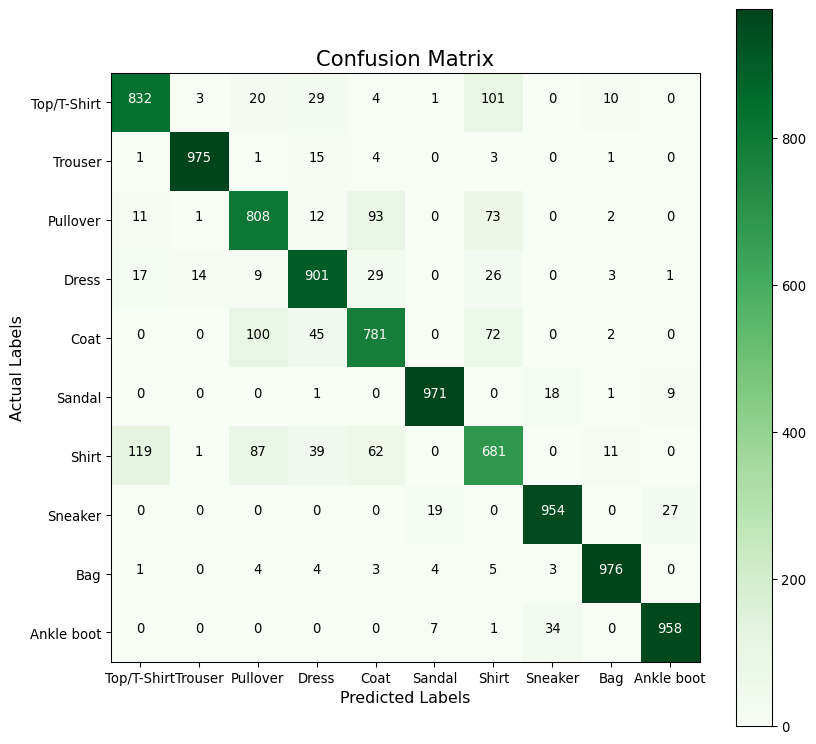

In [32]:
plt.figure(figsize=(10,10), dpi=95)
plt.imshow(cm, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(10)
plt.yticks(tick_marks, label_names)
plt.xticks(tick_marks, label_names)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
            color='white' if cm[i, j] > cm.max()/2 else 'black')
    

plt.show()

In [38]:
# print the accuracy
acc_cm = accuracy_score(y_test, y_pred)
print(f"Accuracy = {acc_cm * 100}%")

Accuracy = 88.37%
